In [5]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

import seaborn as sns

In [6]:
palette = sns.color_palette('viridis', n_colors=8)
palette

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

# Lotka-Volterra equations

\begin{align}
\dot X_1 &= a_1 X_1 - a_2 X_1 X_2 \\
\dot X_2 &= a_3 X_1 X_2 - a_4 X_2 - a_5 X_2 X_3 \\
\dot X_3 &= a_6 X_2 X_3 - a_7 X_3 \\
\end{align}

In [16]:
def modelLV(Y, t, a1, a2, a3, a4, a5, a6, a7):
    X1, X2, X3 = Y
    
    dX1 = a1*X1 - a2*X1*X2
    dX2 = a3*X1*X2 - a4*X2 - a5*X2*X3
    dX3 = a6*X2*X3 - a7*X3
    
    return [dX1, dX2, dX3]

In [23]:
a1 = 0.1 # Reproduction rate of X1
a2 = 0.1 # Rate of predation of X2 on X1
a3 = 0.1 # Reproduction rate of X2 in presence of X1
a4 = 0.1 # Mortality rate of X1
a5 = 0.1 # Rate of predation of X3 on X2
a6 = 0.1
a7 = 0.1

In [24]:
X1_0 = 10
X2_0 = 10
X3_0 = 10
Y0 = [X1_0, X2_0, X3_0]

In [25]:
t = np.linspace(0, 80, 161)

In [26]:
sol = odeint(modelLV, Y0, t, args=(a1, a2, a3, a4, a5, a6, a7))

In [27]:
X1 = sol[:,0]
X2 = sol[:,1]
X3 = sol[:,2]

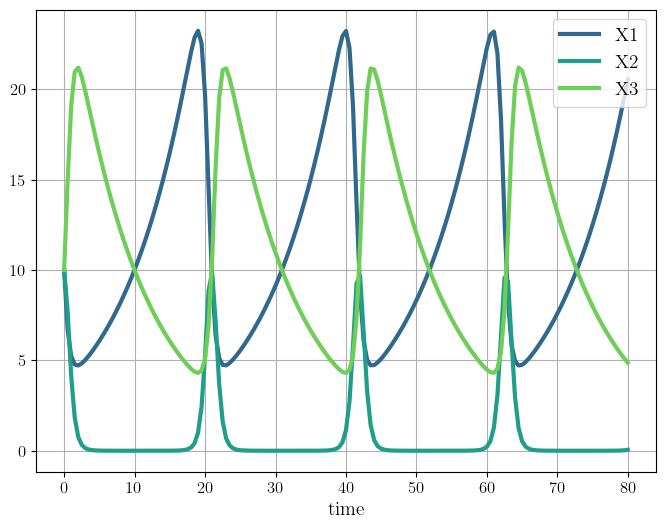

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')

axs.plot(t, X1, lw=3, color=palette[2], label='X1')
axs.plot(t, X2, lw=3, color=palette[4], label='X2')
axs.plot(t, X3, lw=3, color=palette[6], label='X3')
axs.legend(loc='best')
axs.set_xlabel('time')
axs.grid()

plt.show()

In [152]:
np.savetxt('LVdata.data', np.transpose([t[0::5],X[0::5],Y[0::5]]), delimiter=' ', fmt='%.2f', header='Time X Y')

In [153]:
t[0::5]

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
       27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5,
       55. , 57.5, 60. , 62.5, 65. , 67.5, 70. , 72.5, 75. , 77.5, 80. ])

## Recovering parameters

In [163]:
dfData = pd.read_csv('LVdata.data', sep=' ')

In [164]:
names=['alpha', 'beta', 'delta', 'gamma']

In [165]:
params = np.loadtxt('pars.dat', comments='#')
for i in range(len(names)):
    print(f'{names[i]} = {params[i]}')

alpha = 0.096353
beta = 0.020652
delta = 0.021173
gamma = 0.4211


In [166]:
alpha = params[0]
beta = params[1]
delta = params[2]
gamma = params[3]

In [174]:
X0 = 10
Y0 = 10
Z0 = [X0, Y0]

In [175]:
t = np.linspace(0, 80, 161)

In [176]:
sol = odeint(modelLV, Z0, t, args=(alpha, beta, delta, gamma))

In [177]:
X = sol[:,0]
Y = sol[:,1]

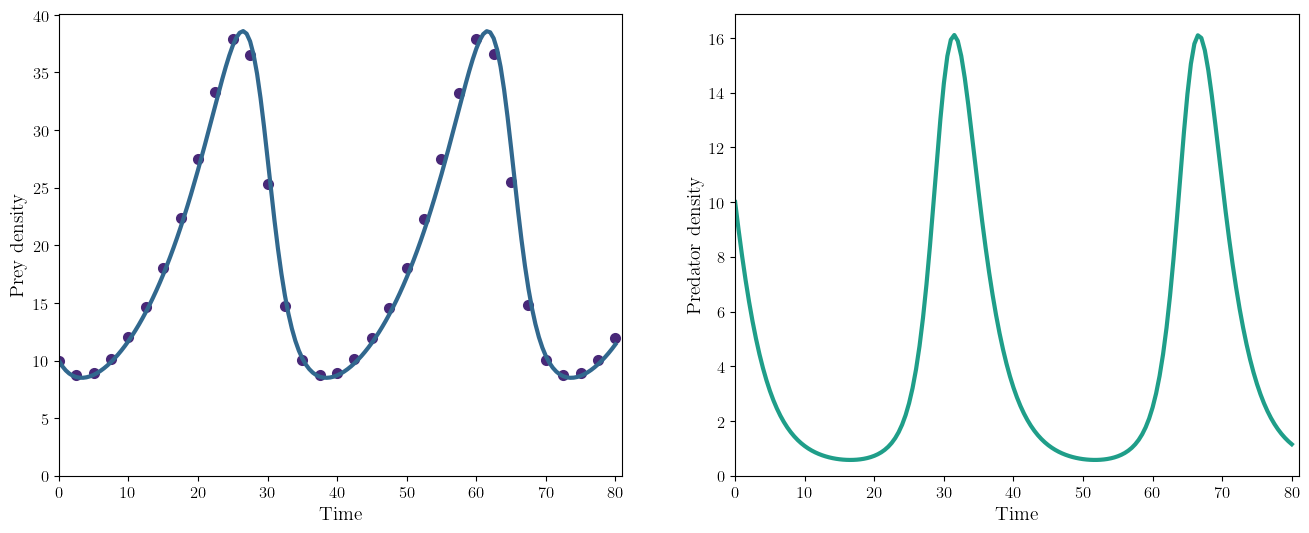

In [178]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6), facecolor='white')

# Prey
axs[0].plot(t, X, lw=3, color=palette[2])
axs[0].scatter(x=dfData['Time'], y=dfData['X'], color=palette[0], lw=2)
axs[0].set_ylim((0))
axs[0].set_ylabel('Prey density')

# rect1 = plt.Rectangle((dfData['Time'][0] - 0.5, np.log10(df8['Trachea'][0]) - 0.25), 1, 0.5, fc=palette[7], alpha = 0.5)
# rect2 = plt.Rectangle((df8['Day'][1] - 0.5, np.log10(df8['Trachea'][1]) - 0.25), 1, 0.5, fc=palette[7], alpha = 0.5)
# rect3 = plt.Rectangle((df8['Day'][2] - 0.5, np.log10(df8['Trachea'][2]) - 0.25), 1, 0.5, fc=palette[7], alpha = 0.5)
# rect4 = plt.Rectangle((df8['Day'][3] - 0.5, np.log10(df8['Trachea'][3]) - 0.25), 1, 0.5, fc=palette[7], alpha = 0.5)
# axs[2,1].add_patch(rect1)
# axs[2,1].add_patch(rect2)
# axs[2,1].add_patch(rect3)
# axs[2,1].add_patch(rect4)
#axs[1].scatter(x=dfData['Time'], y=dfData['Y']), color=palette[6], marker='x', s=100, lw=3)
axs[1].plot(t, Y, lw=3, color=palette[4])
axs[1].set_ylim((0))
axs[1].set_ylabel('Predator density')

plt.setp(axs, xlim=(0,81), xlabel='Time')

plt.show()